<a href="https://colab.research.google.com/github/adibamini92/Machine-Learning/blob/master/ANN_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from sklearn.datasets import load_iris #The Library for Iris Dataset
#loading the Iris dataset
iris = load_iris()

In [50]:
import numpy as np #Algebra, Arrays, Multidimensional Data
import pandas as pd #Library for for data manipulation and analysis
#Dividing the features and the target and merge it to one united dataset, and also relabeling them
Data = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [51]:
#Split the dataset to features and target
Data.loc[Data["target"]=="Iris-setosa","target"]=0 
Data.loc[Data["target"]=="Iris-versicolor","target"]=1
Data.loc[Data["target"]=="Iris-virginica","target"]=2
Data=Data.iloc[np.random.permutation(len(Data))]
X=Data.iloc[:,1:5].values
y=Data.iloc[:,4].values
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [52]:
from sklearn.preprocessing import normalize #ML algorithm
#Normalizing the data set for better fit of the dataset to ML algorithm
X_normalized=normalize(X,axis=0)
#Split the data to test and train, with 80% for train and the remaining 20% for testing the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print(X_train.shape[0])
print(y_train.shape[0])
print(X_test.shape[0])
print(y_test.shape[0])

120
120
30
30


In [53]:
#Libraries utilized in ANN
import keras #A library that provides a Python interface for artificial neural networks
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from keras.utils import np_utils
#Categorizing the features and target
y_train=np_utils.to_categorical(y_train,num_classes=3)
y_test=np_utils.to_categorical(y_test,num_classes=3)
print(y_train.shape)
print(y_test.shape)

#ANN model
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu')) #First Layer of ANN
model.add(Dense(500,activation='relu')) #Second Layer of ANN
model.add(Dense(300,activation='relu')) #Third Layer of ANN
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

(120, 3)
(30, 3)
Epoch 1/10
6/6 [==============================] - 2s 58ms/step - loss: 1.0777 - accuracy: 0.4417 - val_loss: 1.0338 - val_accuracy: 0.6333
Epoch 2/10
6/6 [==============================] - 0s 24ms/step - loss: 0.9765 - accuracy: 0.6750 - val_loss: 0.8950 - val_accuracy: 0.6333
Epoch 3/10
6/6 [==============================] - 0s 27ms/step - loss: 0.7938 - accuracy: 0.6750 - val_loss: 0.6773 - val_accuracy: 0.6333
Epoch 4/10
6/6 [==============================] - 0s 23ms/step - loss: 0.5597 - accuracy: 0.7833 - val_loss: 0.4343 - val_accuracy: 0.9000
Epoch 5/10
6/6 [==============================] - 0s 23ms/step - loss: 0.3227 - accuracy: 0.9583 - val_loss: 0.2364 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 23ms/step - loss: 0.1667 - accuracy: 1.0000 - val_loss: 0.1048 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 24ms/step - loss: 0.0777 - accuracy: 1.0000 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 8/10

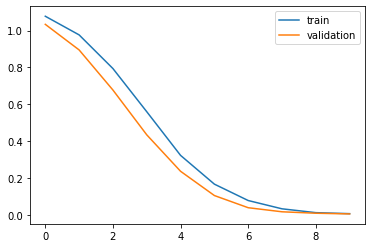

In [62]:
import matplotlib.pyplot as plt #Visualisation 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [59]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print('The accuracy percentage of the model equals =', accuracy)

1/1 [==============================] - 0s 27ms/step
The accuracy percentage of the model equals = 100.0
